In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import folium
from folium.plugins import HeatMap

In [22]:
df1 = pd.read_csv(r'C:\Users\Johannes\Documents\Uni\Master\Tech_Labs\ws24-skillswap\DS\01_Notebooks\02_Features_Insights\01_User_Activity_Status\Skillswap_Data_Activity_Status.csv')

df1.head()

,First_Name,EMail,Age,Gender,Location_Preferences,Latitude,Longitude,Country,City,Languages_Preferred,Last_Seen,Response_Time,Farming_off,Fishery_off,Gardening_off,Pet grooming_off,Pet training_off,Drawing_off,Painting_off,Sculpture_off,Print making_off,Poetry_off,Make-up_off,Facials_off,Pedicure & Manicure_off,Hair care_off,Ballet_off,Tap dance_off,Jazz dance_off,Salsa_off,Ballroom dance_off,Piano_off,Guitar_off,Drumming_off,Trumpet_off,Composing_off,Script writing_off,Play writing_off,Poetry writing_off,Caligraphy_off,Blogging_off,Journalism_off,German_off,Spanish_off,Arabic_off,French_off,English_off,Nutrition_off,Fitness & Excercise_off,Wellness_off,Tennis_off,Football_off,Basketball_off,Yoga_off,Baseball_off,Gymnastic_off,Cooking_off,Baking_off,Grilling_off,Meal planning_off,Sautéing_off,Programming_off,Graphic design_off,Data Analysis_off,Photoshop_off,Social Media_off,Camera handling_off,Photo editing_off,Lighting_off,Landscape photography_off,Portrait photography_off,Image processing_off,Video editing_off,Film making_off,Animation_off,Motion graphics_off,Visual effects_off,Skill Domains,Farming_dem,Fishery_dem,Gardening_dem,Pet grooming_dem,Pet training_dem,Drawing_dem,Painting_dem,Sculpture_dem,Print making_dem,Poetry_dem,Make-up_dem,Facials_dem,Pedicure & Manicure_dem,Hair care_dem,Ballet_dem,Tap dance_dem,Jazz dance_dem,Salsa_dem,Ballroom dance_dem,Piano_dem,Guitar_dem,Drumming_dem,Trumpet_dem,Composing_dem,Script writing_dem,Play writing_dem,Poetry writing_dem,Caligraphy_dem,Blogging_dem,Journalism_dem,German_dem,Spanish_dem,Arabic_dem,French_dem,English_dem,Nutrition_dem,Fitness & Excercise_dem,Wellness_dem,Tennis_dem,Football_dem,Basketball_dem,Yoga_dem,Baseball_dem,Gymnastic_dem,Cooking_dem,Baking_dem,Grilling_dem,Meal planning_dem,Sautéing_dem,Programming_dem,Graphic design_dem,Data Analysis_dem,Photoshop_dem,Social Media_dem,Camera handling_dem,Photo editing_dem,Lighting_dem,Landscape photography_dem,Portrait photography_dem,Image processing_dem,Video editing_dem,Film making_dem,Animation_dem,Motion graphics_dem,Visual effects_dem,Count_Farming_off,Count_Fishery_off,Count_Gardening_off,Count_Pet_grooming_off,Count_Pet_training_off,Count_Drawing_off,Count_Painting_off,Count_Sculpture_off,Count_Print_making_off,Count_Poetry_off,Count_Make_up_off,Count_Facials_off,Count_Pedicure_and_Manicure_off,Count_Hair_care_off,Count_Ballet_off,Count_Tap_dance_off,Count_Jazz_dance_off,Count_Salsa_off,Count_Ballroom_dance_off,Count_Piano_off,Count_Guitar_off,Count_Drumming_off,Count_Trumpet_off,Count_Composing_off,Count_Script_writing_off,Count_Play_writing_off,Count_Poetry_writing_off,Count_Caligraphy_off,Count_Blogging_off,Count_Journalism_off,Count_German_off,Count_Spanish_off,Count_Arabic_off,Count_French_off,Count_English_off,Count_Nutrition_off,Count_Fitness_and_Excercise_off,Count_Wellness_off,Count_Tennis_off,Count_Football_off,Count_Basketball_off,Count_Yoga_off,Count_Baseball_off,Count_Gymnastic_off,Count_Cooking_off,Count_Baking_off,Count_Grilling_off,Count_Meal_planning_off,Count_Sautéing_off,Count_Programming_off,Count_Graphic_design_off,Count_Data_Analysis_off,Count_Photoshop_off,Count_Social_Media_off,Count_Camera_handling_off,Count_Photo_editing_off,Count_Lighting_off,Count_Landscape_photography_off,Count_Portrait_photography_off,Count_Image_processing_off,Count_Video_editing_off,Count_Film_making_off,Count_Animation_off,Count_Motion_graphics_off,Count_Visual_effects_off,Count_Social Media_off,Count_Make-up_off,Count_Video editing_off,Count_Film making_off,Count_Pedicure & Manicure_off,Count_Pet training_off,Count_Pet grooming_off,Count_Graphic design_off,Count_Image processing_off,Count_Fitness & Excercise_off,Count_Visual effects_off,Count_Camera handling_off,Count_Print making_off,Count_Hair care_off,Count_Play writing_off,Count_Portrait photography_off,Count_Data Analysis_off,Count_Tap dance_off,Count_Photo editing_off,Count_Meal planning_off,Count_Landscape photography_off,Count_Jazz dance_off,Count_Ballro

# 1. General info on data set

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 257 entries, First_Name to Sum_Skills_Off_ab_avg
dtypes: float64(109), int64(67), object(81)
memory usage: 1.6+ MB


In [24]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df_describe = df1.drop(columns=['Latitude', 'Longitude'])
df_describe.describe()

,Age,Farming_dem,Fishery_dem,Gardening_dem,Pet grooming_dem,Pet training_dem,Drawing_dem,Painting_dem,Sculpture_dem,Print making_dem,Poetry_dem,Make-up_dem,Facials_dem,Pedicure & Manicure_dem,Hair care_dem,Ballet_dem,Tap dance_dem,Jazz dance_dem,Salsa_dem,Ballroom dance_dem,Piano_dem,Guitar_dem,Drumming_dem,Trumpet_dem,Composing_dem,Script writing_dem,Play writing_dem,Poetry writing_dem,Caligraphy_dem,Blogging_dem,Journalism_dem,German_dem,Spanish_dem,Arabic_dem,French_dem,English_dem,Nutrition_dem,Fitness & Excercise_dem,Wellness_dem,Tennis_dem,Football_dem,Basketball_dem,Yoga_dem,Baseball_dem,Gymnastic_dem,Cooking_dem,Baking_dem,Grilling_dem,Meal planning_dem,Sautéing_dem,Programming_dem,Graphic design_dem,Data Analysis_dem,Photoshop_dem,Social Media_dem,Camera handling_dem,Photo editing_dem,Lighting_dem,Landscape photography_dem,Portrait photography_dem,Image processing_dem,Video editing_dem,Film making_dem,Animation_dem,Motion graphics_dem,Visual effects_dem,Count_Farming_off,Count_Fishery_off,Count_Gardening_off,Count_Pet_grooming_off,Count_Pet_training_off,Count_Drawing_off,Count_Painting_off,Count_Sculpture_off,Count_Print_making_off,Count_Poetry_off,Count_Make_up_off,Count_Facials_off,Count_Pedicure_and_Manicure_off,Count_Hair_care_off,Count_Ballet_off,Count_Tap_dance_off,Count_Jazz_dance_off,Count_Salsa_off,Count_Ballroom_dance_off,Count_Piano_off,Count_Guitar_off,Count_Drumming_off,Count_Trumpet_off,Count_Composing_off,Count_Script_writing_off,Count_Play_writing_off,Count_Poetry_writing_off,Count_Caligraphy_off,Count_Blogging_off,Count_Journalism_off,Count_German_off,Count_Spanish_off,Count_Arabic_off,Count_French_off,Count_English_off,Count_Nutrition_off,Count_Fitness_and_Excercise_off,Count_Wellness_off,Count_Tennis_off,Count_Football_off,Count_Basketball_off,Count_Yoga_off,Count_Baseball_off,Count_Gymnastic_off,Count_Cooking_off,Count_Baking_off,Count_Grilling_off,Count_Meal_planning_off,Count_Sautéing_off,Count_Programming_off,Count_Graphic_design_off,Count_Data_Analysis_off,Count_Photoshop_off,Count_Social_Media_off,Count_Camera_handling_off,Count_Photo_editing_off,Count_Lighting_off,Count_Landscape_photography_off,Count_Portrait_photography_off,Count_Image_processing_off,Count_Video_editing_off,Count_Film_making_off,Count_Animation_off,Count_Motion_graphics_off,Count_Visual_effects_off,Count_Social Media_off,Count_Make-up_off,Count_Video editing_off,Count_Film making_off,Count_Pedicure & Manicure_off,Count_Pet training_off,Count_Pet grooming_off,Count_Graphic design_off,Count_Image processing_off,Count_Fitness & Excercise_off,Count_Visual effects_off,Count_Camera handling_off,Count_Print making_off,Count_Hair care_off,Count_Play writing_off,Count_Portrait photography_off,Count_Data Analysis_off,Count_Tap dance_off,Count_Photo editing_off,Count_Meal planning_off,Count_Landscape photography_off,Count_Jazz dance_off,Count_Ballroom dance_off,Count_Script writing_off,Count_Poetry writing_off,Count_Motion graphics_off,Sum_Skills_Off,Sum_Skills_Rec,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Sum_Skills_Off_ab_avg
count,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,20,9,16,0,0,13,12,11,0,11,0,11,0,0,3,0,0,10,0,11,12,11,15,10,0,0,0,8,11,18,16,12,14,6,10,20,0,18,7,15,5,13,17,10,14,9,17,0,21,13,0,0,15,0,0,0,15,0,0,0,0,0,9,0,0,7,9,12,15,13,16,20,17,12,14,9,15,14,12,13,13,14,6,12,16,6,8,8,9,6,16,800,800,45,36,61,45,35,59,65,58,52,67,77,66,73,61,800
mean,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,11,11,NaN,NaN,10,10,7,NaN,11,NaN,10,NaN,NaN,7,NaN,NaN,9,NaN,9,10,8,9,10,NaN,NaN,NaN,8,10,9,10,10,10,12,11,11,NaN,10,8,9,9,11,10,10,9,11,9,NaN,9,9,NaN,NaN,10,NaN,NaN,

In [25]:
pd.set_option('display.max_rows', None)
null_counts = df1.isnull().sum()
null_counts_df = pd.DataFrame(null_counts, columns=['Null Count'])
null_counts_df_transposed = null_counts_df.transpose()
null_counts_df_transposed

,First_Name,EMail,Age,Gender,Location_Preferences,Latitude,Longitude,Country,City,Languages_Preferred,Last_Seen,Response_Time,Farming_off,Fishery_off,Gardening_off,Pet grooming_off,Pet training_off,Drawing_off,Painting_off,Sculpture_off,Print making_off,Poetry_off,Make-up_off,Facials_off,Pedicure & Manicure_off,Hair care_off,Ballet_off,Tap dance_off,Jazz dance_off,Salsa_off,Ballroom dance_off,Piano_off,Guitar_off,Drumming_off,Trumpet_off,Composing_off,Script writing_off,Play writing_off,Poetry writing_off,Caligraphy_off,Blogging_off,Journalism_off,German_off,Spanish_off,Arabic_off,French_off,English_off,Nutrition_off,Fitness & Excercise_off,Wellness_off,Tennis_off,Football_off,Basketball_off,Yoga_off,Baseball_off,Gymnastic_off,Cooking_off,Baking_off,Grilling_off,Meal planning_off,Sautéing_off,Programming_off,Graphic design_off,Data Analysis_off,Photoshop_off,Social Media_off,Camera handling_off,Photo editing_off,Lighting_off,Landscape photography_off,Portrait photography_off,Image processing_off,Video editing_off,Film making_off,Animation_off,Motion graphics_off,Visual effects_off,Skill Domains,Farming_dem,Fishery_dem,Gardening_dem,Pet grooming_dem,Pet training_dem,Drawing_dem,Painting_dem,Sculpture_dem,Print making_dem,Poetry_dem,Make-up_dem,Facials_dem,Pedicure & Manicure_dem,Hair care_dem,Ballet_dem,Tap dance_dem,Jazz dance_dem,Salsa_dem,Ballroom dance_dem,Piano_dem,Guitar_dem,Drumming_dem,Trumpet_dem,Composing_dem,Script writing_dem,Play writing_dem,Poetry writing_dem,Caligraphy_dem,Blogging_dem,Journalism_dem,German_dem,Spanish_dem,Arabic_dem,French_dem,English_dem,Nutrition_dem,Fitness & Excercise_dem,Wellness_dem,Tennis_dem,Football_dem,Basketball_dem,Yoga_dem,Baseball_dem,Gymnastic_dem,Cooking_dem,Baking_dem,Grilling_dem,Meal planning_dem,Sautéing_dem,Programming_dem,Graphic design_dem,Data Analysis_dem,Photoshop_dem,Social Media_dem,Camera handling_dem,Photo editing_dem,Lighting_dem,Landscape photography_dem,Portrait photography_dem,Image processing_dem,Video editing_dem,Film making_dem,Animation_dem,Motion graphics_dem,Visual effects_dem,Count_Farming_off,Count_Fishery_off,Count_Gardening_off,Count_Pet_grooming_off,Count_Pet_training_off,Count_Drawing_off,Count_Painting_off,Count_Sculpture_off,Count_Print_making_off,Count_Poetry_off,Count_Make_up_off,Count_Facials_off,Count_Pedicure_and_Manicure_off,Count_Hair_care_off,Count_Ballet_off,Count_Tap_dance_off,Count_Jazz_dance_off,Count_Salsa_off,Count_Ballroom_dance_off,Count_Piano_off,Count_Guitar_off,Count_Drumming_off,Count_Trumpet_off,Count_Composing_off,Count_Script_writing_off,Count_Play_writing_off,Count_Poetry_writing_off,Count_Caligraphy_off,Count_Blogging_off,Count_Journalism_off,Count_German_off,Count_Spanish_off,Count_Arabic_off,Count_French_off,Count_English_off,Count_Nutrition_off,Count_Fitness_and_Excercise_off,Count_Wellness_off,Count_Tennis_off,Count_Football_off,Count_Basketball_off,Count_Yoga_off,Count_Baseball_off,Count_Gymnastic_off,Count_Cooking_off,Count_Baking_off,Count_Grilling_off,Count_Meal_planning_off,Count_Sautéing_off,Count_Programming_off,Count_Graphic_design_off,Count_Data_Analysis_off,Count_Photoshop_off,Count_Social_Media_off,Count_Camera_handling_off,Count_Photo_editing_off,Count_Lighting_off,Count_Landscape_photography_off,Count_Portrait_photography_off,Count_Image_processing_off,Count_Video_editing_off,Count_Film_making_off,Count_Animation_off,Count_Motion_graphics_off,Count_Visual_effects_off,Count_Social Media_off,Count_Make-up_off,Count_Video editing_off,Count_Film making_off,Count_Pedicure & Manicure_off,Count_Pet training_off,Count_Pet grooming_off,Count_Graphic design_off,Count_Image processing_off,Count_Fitness & Excercise_off,Count_Visual effects_off,Count_Camera handling_off,Count_Print making_off,Count_Hair care_off,Count_Play writing_off,Count_Portrait photography_off,Count_Data Analysis_off,Count_Tap dance_off,Count_Photo editing_off,Count_Meal planning_off,Count_Landscape photography_off,Count_Jazz dance_off,Count_Ballro

In [26]:
pd.set_option('display.max_columns', None)
unique_counts = df1.nunique()
unique_counts_df = pd.DataFrame(unique_counts, columns=['Unique Count'])
unique_counts_df_transposed = unique_counts_df.transpose()
unique_counts_df_transposed


,First_Name,EMail,Age,Gender,Location_Preferences,Latitude,Longitude,Country,City,Languages_Preferred,Last_Seen,Response_Time,Farming_off,Fishery_off,Gardening_off,Pet grooming_off,Pet training_off,Drawing_off,Painting_off,Sculpture_off,Print making_off,Poetry_off,Make-up_off,Facials_off,Pedicure & Manicure_off,Hair care_off,Ballet_off,Tap dance_off,Jazz dance_off,Salsa_off,Ballroom dance_off,Piano_off,Guitar_off,Drumming_off,Trumpet_off,Composing_off,Script writing_off,Play writing_off,Poetry writing_off,Caligraphy_off,Blogging_off,Journalism_off,German_off,Spanish_off,Arabic_off,French_off,English_off,Nutrition_off,Fitness & Excercise_off,Wellness_off,Tennis_off,Football_off,Basketball_off,Yoga_off,Baseball_off,Gymnastic_off,Cooking_off,Baking_off,Grilling_off,Meal planning_off,Sautéing_off,Programming_off,Graphic design_off,Data Analysis_off,Photoshop_off,Social Media_off,Camera handling_off,Photo editing_off,Lighting_off,Landscape photography_off,Portrait photography_off,Image processing_off,Video editing_off,Film making_off,Animation_off,Motion graphics_off,Visual effects_off,Skill Domains,Farming_dem,Fishery_dem,Gardening_dem,Pet grooming_dem,Pet training_dem,Drawing_dem,Painting_dem,Sculpture_dem,Print making_dem,Poetry_dem,Make-up_dem,Facials_dem,Pedicure & Manicure_dem,Hair care_dem,Ballet_dem,Tap dance_dem,Jazz dance_dem,Salsa_dem,Ballroom dance_dem,Piano_dem,Guitar_dem,Drumming_dem,Trumpet_dem,Composing_dem,Script writing_dem,Play writing_dem,Poetry writing_dem,Caligraphy_dem,Blogging_dem,Journalism_dem,German_dem,Spanish_dem,Arabic_dem,French_dem,English_dem,Nutrition_dem,Fitness & Excercise_dem,Wellness_dem,Tennis_dem,Football_dem,Basketball_dem,Yoga_dem,Baseball_dem,Gymnastic_dem,Cooking_dem,Baking_dem,Grilling_dem,Meal planning_dem,Sautéing_dem,Programming_dem,Graphic design_dem,Data Analysis_dem,Photoshop_dem,Social Media_dem,Camera handling_dem,Photo editing_dem,Lighting_dem,Landscape photography_dem,Portrait photography_dem,Image processing_dem,Video editing_dem,Film making_dem,Animation_dem,Motion graphics_dem,Visual effects_dem,Count_Farming_off,Count_Fishery_off,Count_Gardening_off,Count_Pet_grooming_off,Count_Pet_training_off,Count_Drawing_off,Count_Painting_off,Count_Sculpture_off,Count_Print_making_off,Count_Poetry_off,Count_Make_up_off,Count_Facials_off,Count_Pedicure_and_Manicure_off,Count_Hair_care_off,Count_Ballet_off,Count_Tap_dance_off,Count_Jazz_dance_off,Count_Salsa_off,Count_Ballroom_dance_off,Count_Piano_off,Count_Guitar_off,Count_Drumming_off,Count_Trumpet_off,Count_Composing_off,Count_Script_writing_off,Count_Play_writing_off,Count_Poetry_writing_off,Count_Caligraphy_off,Count_Blogging_off,Count_Journalism_off,Count_German_off,Count_Spanish_off,Count_Arabic_off,Count_French_off,Count_English_off,Count_Nutrition_off,Count_Fitness_and_Excercise_off,Count_Wellness_off,Count_Tennis_off,Count_Football_off,Count_Basketball_off,Count_Yoga_off,Count_Baseball_off,Count_Gymnastic_off,Count_Cooking_off,Count_Baking_off,Count_Grilling_off,Count_Meal_planning_off,Count_Sautéing_off,Count_Programming_off,Count_Graphic_design_off,Count_Data_Analysis_off,Count_Photoshop_off,Count_Social_Media_off,Count_Camera_handling_off,Count_Photo_editing_off,Count_Lighting_off,Count_Landscape_photography_off,Count_Portrait_photography_off,Count_Image_processing_off,Count_Video_editing_off,Count_Film_making_off,Count_Animation_off,Count_Motion_graphics_off,Count_Visual_effects_off,Count_Social Media_off,Count_Make-up_off,Count_Video editing_off,Count_Film making_off,Count_Pedicure & Manicure_off,Count_Pet training_off,Count_Pet grooming_off,Count_Graphic design_off,Count_Image processing_off,Count_Fitness & Excercise_off,Count_Visual effects_off,Count_Camera handling_off,Count_Print making_off,Count_Hair care_off,Count_Play writing_off,Count_Portrait photography_off,Count_Data Analysis_off,Count_Tap dance_off,Count_Photo editing_off,Count_Meal planning_off,Count_Landscape photography_off,Count_Jazz dance_off,Count_Ballro

# 2. Demographics & Locations

## 2.1 Gender Split

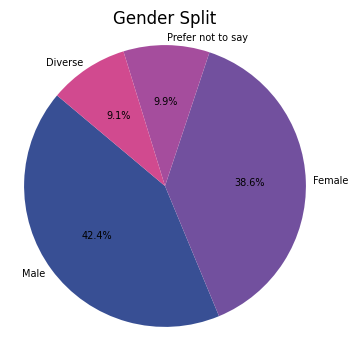

In [27]:
gender_counts = df1['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors = ['#384f94', '#72509e', '#a54d9d', '#d14a8f'], textprops={'fontsize': 7}, labeldistance=1.05)
plt.title('Gender Split', fontsize=12)
plt.axis('equal')  
plt.show()

## 2.2 Age Distribution

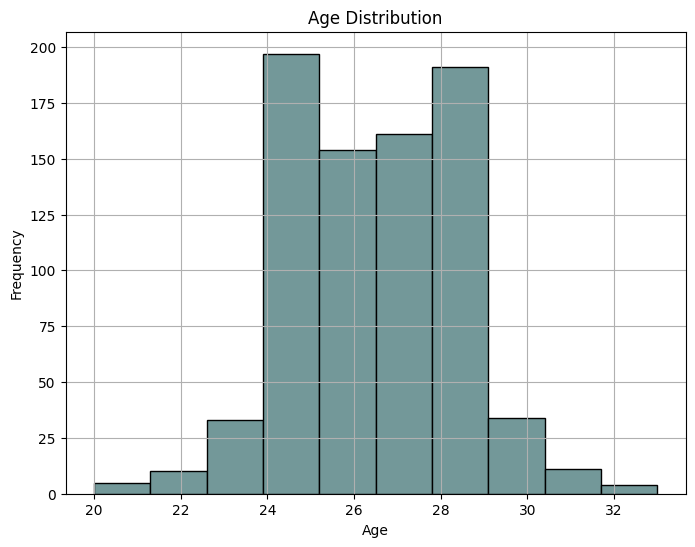

In [28]:
plt.figure(figsize=(8, 6))
plt.hist(df1['Age'], bins=10, color='#739899', edgecolor='black') 
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## 2.3 Age distribution by gender

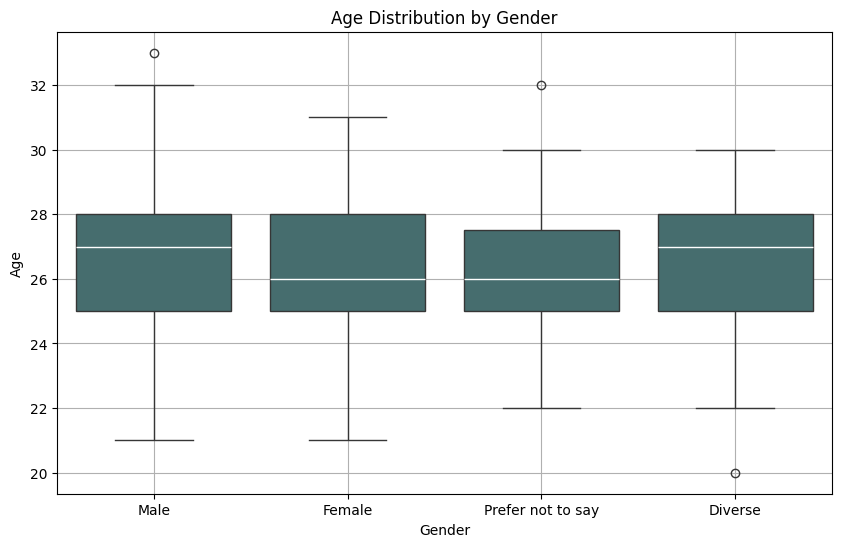

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=df1, color='#407374',  medianprops={'color': 'white'})
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.grid(True)
plt.show()

## 2.4 User locations

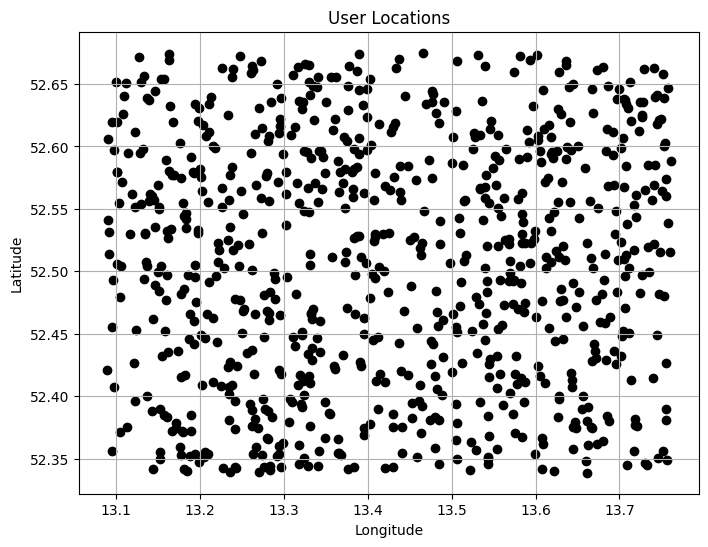

In [30]:
coordinates = [(lat, lon) for lat, lon in zip(df1['Latitude'], df1['Longitude'])]

lats, lons = zip(*coordinates)

plt.figure(figsize=(8, 6))
plt.scatter(lons, lats, color='black', marker='o')  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('User Locations')
plt.grid(True)
plt.show()

In [31]:
map_berlin = folium.Map(location=[52.52, 13.4050], zoom_start=10)

coordinates = df1[['Latitude', 'Longitude']].values.tolist()
heat_map = HeatMap(coordinates, radius=12)  
heat_map.add_to(map_berlin)

map_berlin

# 3. Teaching and learning ambitions

## 3.1 Top 3 most taught skill domains by gender (highlighted)

In [32]:
skill_domains = [
   "Agriculture",
    "Animal Care",
    "Art",
    "Beauty",
    "Dance",
    "Music",
    "Writing",
    "Language",
    "Health",
    "Sports",
    "Food",
    "Technology",
    "Photo",
    "Video"
]

gender_counts = {}

for skill_domain in skill_domains:
    counts = df1.groupby('Gender')[skill_domain].sum()
    gender_counts[skill_domain] = counts

gender_skill_counts_df = pd.DataFrame(gender_counts)

order = ["Female", "Male", "Diverse", "Prefer not to say"]
gender_skill_counts_df = gender_skill_counts_df.reindex(order)

gender_skill_counts_df = gender_skill_counts_df.transpose().astype(int)

def highlight_max_second_max_third_max(s):
    max_val = s.max()
    second_max_val = s.nlargest(2).min()
    third_max_val = s.nlargest(3).min()
    is_max = s == max_val
    is_second_max = s == second_max_val
    is_third_max = s == third_max_val
    colors = ['#003030' if v else '' for v in is_max]
    colors = ['#407374' if v else color for v, color in zip(is_second_max, colors)]
    colors = ['#739899' if v else color for v, color in zip(is_third_max, colors)]
    return ['background-color: %s' % color for color in colors]

styled_gender_skill_counts_df = gender_skill_counts_df.style.apply(highlight_max_second_max_third_max)

styled_gender_skill_counts_df

Gender,Female,Male,Diverse,Prefer not to say
Agriculture,182,178,74,40
Animal Care,161,116,21,41
Art,169,298,53,61
Beauty,163,171,25,38
Dance,142,111,0,54
Music,242,212,44,48
Writing,242,307,11,54
Language,276,204,73,51
Health,230,186,92,56
Sports,233,314,51,66


## 3.2 (Some of) Top 10 Teachers 

In [33]:
df1["Sum_Skills_Off"] = df1["Sum_Skills_Off"].astype(int)
df_teachers = df1.rename(columns={"First_Name": "Name", "Sum_Skills_Off": "Lessons taught"})
df_teachers.sort_values(by="Lessons taught", ascending=False)[["Name", "Lessons taught"]].head(10)


,Name,Lessons taught
335,Gonçalo,23
726,Diego,21
133,Teófila,20
627,Lorraine,20
127,Olga,20
752,Orgün,19
556,Dariusz,19
283,Fredi,18
514,Gilles,18
781,Emin,18


## 3.3 (Some of) Top 10 Learners

In [34]:
df1["Sum_Skills_Rec"] = df1["Sum_Skills_Rec"].astype(int)
df_learners = df1.rename(columns={"First_Name": "Name", "Sum_Skills_Rec": "Lessons received"})
df_learners.sort_values(by="Lessons received", ascending=False)[["Name", "Lessons received"]].head(10)

,Name,Lessons received
335,Gonçalo,25
133,Teófila,23
593,Michelle,22
514,Gilles,21
463,Muvaffak,21
651,Vasco,20
781,Emin,20
288,Margot,20
742,Adrian,20
730,Marcin,19


## 3.4 Comparison distribution of learning and teaching 

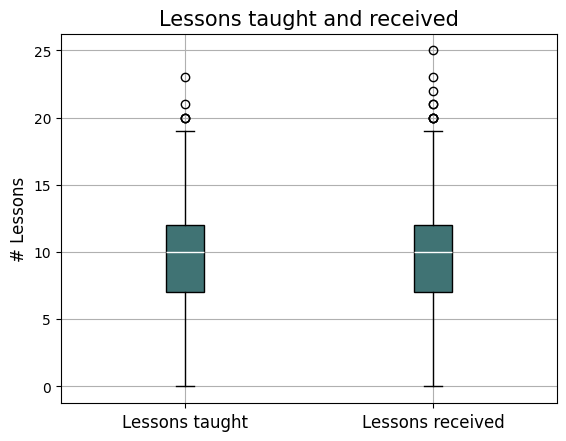

In [67]:

df_skills = df1.rename(columns={"Sum_Skills_Off": "Lessons taught", "Sum_Skills_Rec": "Lessons received"})

boxplot = df_skills.boxplot(column=['Lessons taught', 'Lessons received'], 
                    patch_artist=True,
                    boxprops={'facecolor': '#407374', 'edgecolor': 'black'},
                    whiskerprops={'color': 'black'},
                    medianprops={'color': 'white'})

plt.title('Lessons taught and received', fontsize = 15)
plt.xlabel('')
plt.ylabel('# Lessons', fontsize = 12)
plt.xticks(fontsize=12)

plt.show()


## 3.5 Top 3 most demanded (taught) skills

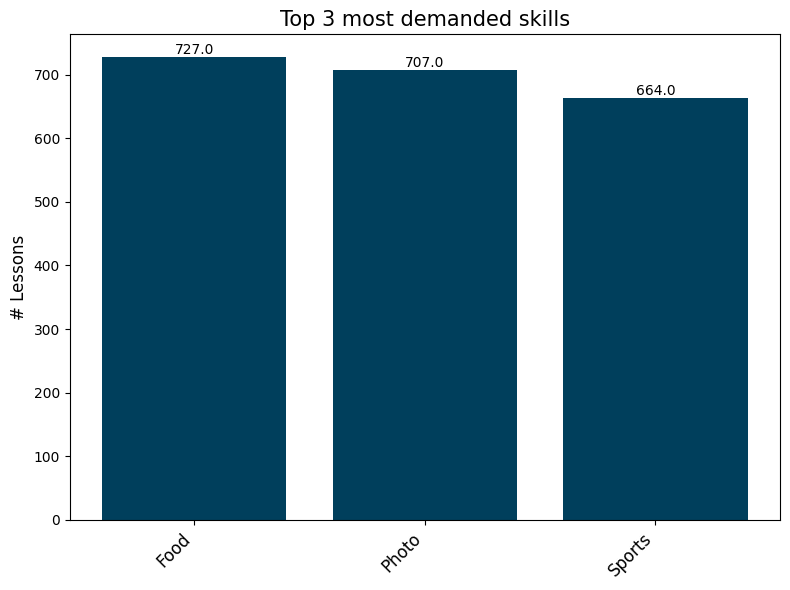

In [68]:
sums = {}
for skill_domain in skill_domains:
    sums[skill_domain] = df1[skill_domain].sum()

top_3 = sorted(sums.items(), key=lambda x: x[1], reverse=True)[:3]

top_3_skills = [item[0] for item in top_3]
top_3_values = [item[1] for item in top_3]

plt.figure(figsize=(8, 6))
plt.bar(top_3_skills, top_3_values, color='#003f5c')

plt.ylabel('# Lessons', fontsize = 12)
plt.title('Top 3 most demanded skills', fontsize = 15)

for i, value in enumerate(top_3_values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 4. Platform Experience / Happiness

## 4.1 Rating across feedback categories 

In [37]:
rating_options = [
    "Very Dissatisfied",
    "Dissatisfied",
    "Neutral or Average",
    "Satisfied",
    "Very Satisfied"
]

counts_dict = {}

for column in df1.columns:
    column_counts = df1[column].value_counts()
    counts_dict[column] = {option: column_counts.get(option, 0) for option in rating_options}

counts_df = pd.DataFrame(counts_dict)

counts_df = counts_df.transpose()
rows_to_select = ['Usability', 'Speed_Performance', 'Feature_Satisfaction', 'Security_Satisfaction', 'Customer_Support']
filtered_df = counts_df.loc[rows_to_select]
filtered_df

,Very Dissatisfied,Dissatisfied,Neutral or Average,Satisfied,Very Satisfied
Usability,79,144,196,237,144
Speed_Performance,72,147,219,215,147
Feature_Satisfaction,68,153,215,216,148
Security_Satisfaction,88,145,227,206,134
Customer_Support,72,156,212,221,139


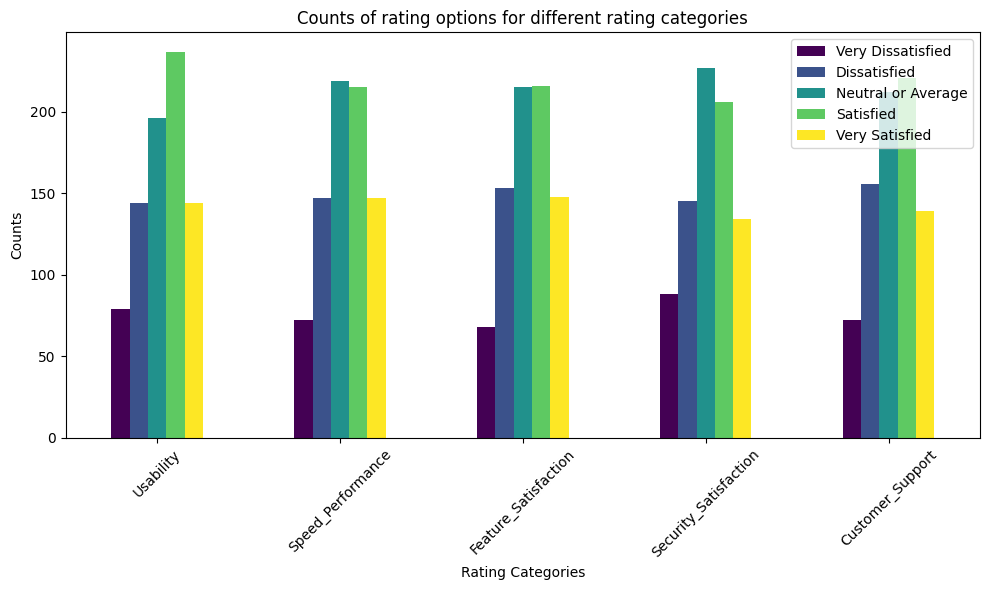

In [38]:
filtered_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title('Counts of rating options for different rating categories')
plt.xlabel('Rating Categories')
plt.ylabel('Counts')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

# 5. Preparation for ML Model

In [43]:
df_x = pd.read_csv(r'C:\Users\Johannes\Documents\Uni\Master\Tech_Labs\ws24-skillswap\DS\01_Notebooks\03_Feature_Engineering\Activity_Projection_Encoded.csv')

In [42]:
df_ML = df_x.drop(columns=["Sum_Skills_Off_ab_avg"], inplace=False)
df_ML.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Sum_Skills_Off
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,11
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,6
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,10
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10


## 5.1 Examine target variable

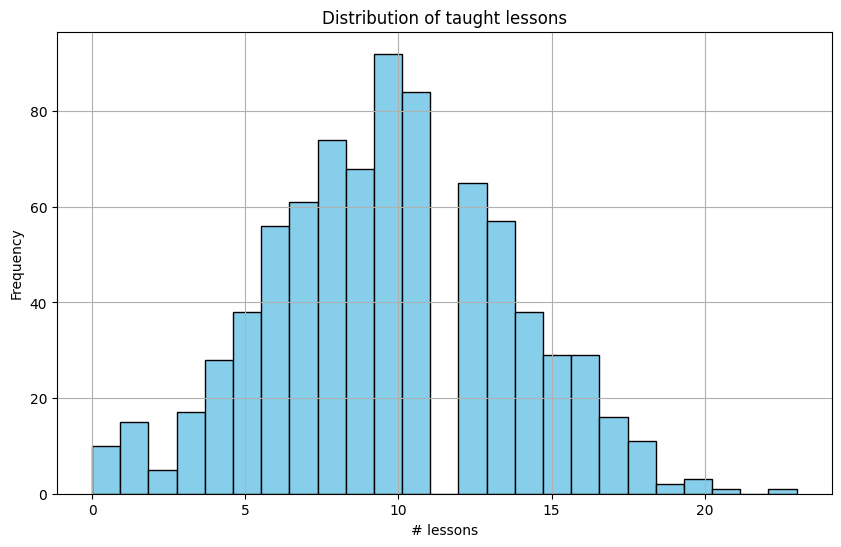

In [62]:
column_name = 'Sum_Skills_Off'

plt.figure(figsize=(10, 6)) 
plt.hist(df_ML[column_name], bins=25, color='skyblue', edgecolor='black')  
plt.title('Distribution of taught lessons')  
plt.xlabel('# lessons')  
plt.ylabel('Frequency') 
plt.grid(True) 
plt.show()  

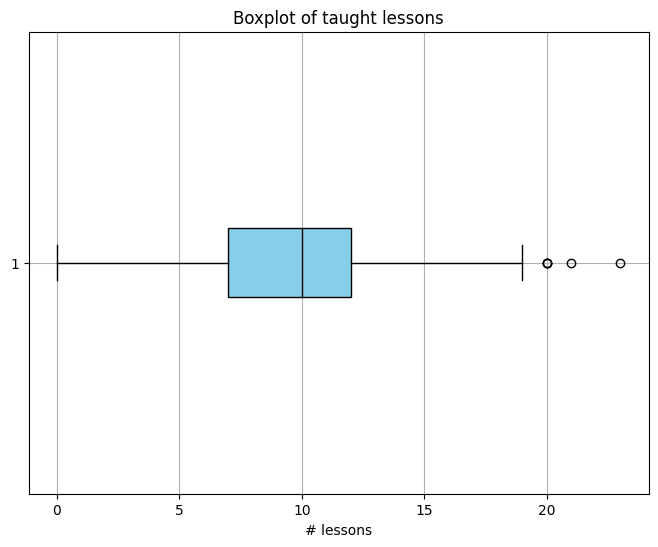

In [64]:
column_name = 'Sum_Skills_Off'

plt.figure(figsize=(8, 6))  
boxprops = dict(facecolor='skyblue', color='black')  
medianprops = dict(color='black') 
plt.boxplot(df_ML[column_name], vert=False, patch_artist=True, boxprops=boxprops, medianprops=medianprops) 
plt.title('Boxplot of taught lessons') 
plt.xlabel('# lessons')  
plt.grid(True)  
plt.show()  

## 5.2 Examine correlations among features

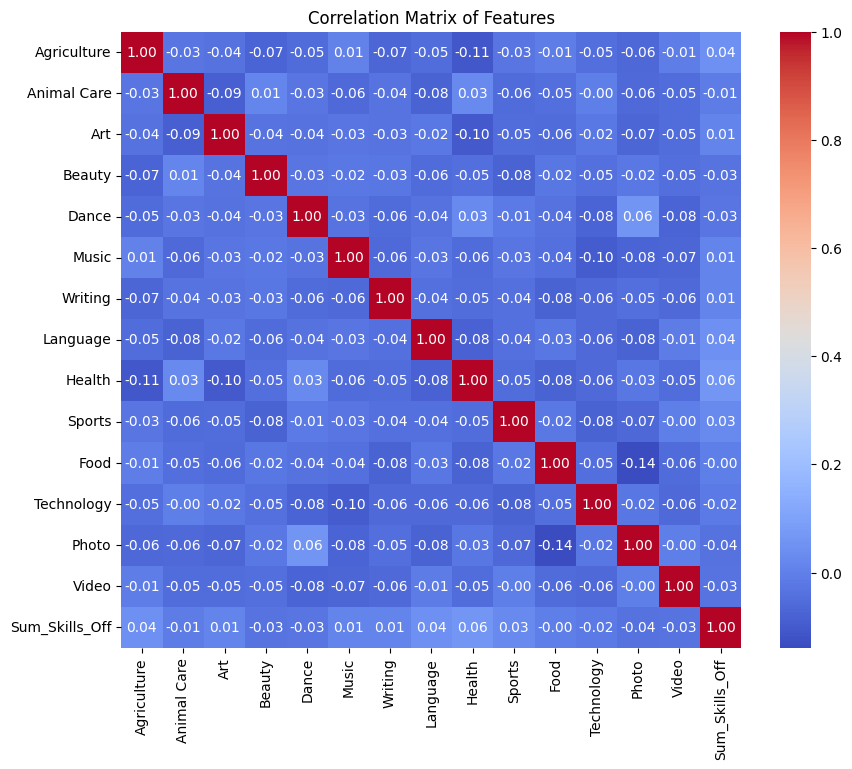

In [51]:
correlation_matrix = df_ML.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()